In [1]:
using Jacobi
using PyPlot
include("../../HPFEM.jl/src/HPFEM.jl");

In [2]:
M= 10
Q=M + 1
nel = 1
nnodes = nel + 1
a=-1
b= 1
nodes = collect(linspace(a, b, nnodes));

idir = [1]
lagr = HPFEM.Lagrange1d(M);

quad = HPFEM.QuadType(Q);
base = HPFEM.Basis1d(lagr, quad);

lmap = HPFEM.locmap(base)
dof = HPFEM.DofMap1d(lmap, nnodes, idir);

In [3]:
dof.lmap.bndry

2-element Array{Int64,1}:
  1
 10

In [4]:
HPFEM.ninterior(dof.lmap)

8

# EDO 
Resolveremos a EDO com a seguinte condição de dirichlet condição de dirichlet :
\begin{equation}
    y'' + y = (1 - 4 \pi^2)\ sin(2\ \pi\ x),\\
    y(x) =  sin(2\ \pi\ x)    
\end{equation}

In [5]:
fun(x) = (1 + 4*pi^2)*sin(2*pi*x)
resp(x) = sin(2*pi*x)
dresp(x)= 2*pi*cos(2*pi*x)



dresp (generic function with 1 method)

In [6]:
elemento = [HPFEM.Element1d(e, nodes[e], nodes[e+1], base) for e = 1:nel]
#solver = HPFEM.CholeskySC(dof, HPFEM.BBMatrix);
solver = HPFEM.CholeskySC(dof, HPFEM.BBSymTri);

In [7]:
for e = 1:nel
    x  = elemento[e].x   
    Ae = HPFEM.mass_matrix(base, elemento[e])
    Se = HPFEM.stiff_matrix(base,elemento[e])
    Ae = Ae + Se
    HPFEM.add_local_matrix(solver, e, Ae)
end


In [8]:
Fe = zeros(HPFEM.nmodes(lmap), nel)

for e = 1:nel
    fe = fun(elemento[e].x)
    HPFEM.add_rhs!(base, elemento[e], fe, sub(Fe, :, e))
end


In [9]:
HPFEM.solve!(solver, Fe)


10x1 Array{Float64,2}:
  0.0694064
  0.411968 
  0.615494 
 -1.01624  
 -2.38006  
 -1.54133  
 -3.30247  
 -5.5885   
 -6.0344   
 -6.03872  

In [10]:
nξ = 101
ξ = collect(linspace(-1,1,nξ));
ϕ = zeros(nξ, M)
for i = 1:M
    ϕ[:,i] = base(ξ, i)
end

Ue = ϕ * Fe


101x1 Array{Float64,2}:
  0.0694064
  0.163294 
  0.251425 
  0.333926 
  0.41027  
  0.479469 
  0.54025  
  0.591191 
  0.630848 
  0.657845 
  0.670955 
  0.669163 
  0.651701 
  ⋮        
 -5.77526  
 -5.84474  
 -5.90138  
 -5.94623  
 -5.98055  
 -6.00574  
 -6.02327  
 -6.03461  
 -6.04105  
 -6.04361  
 -6.04287  
 -6.03872  

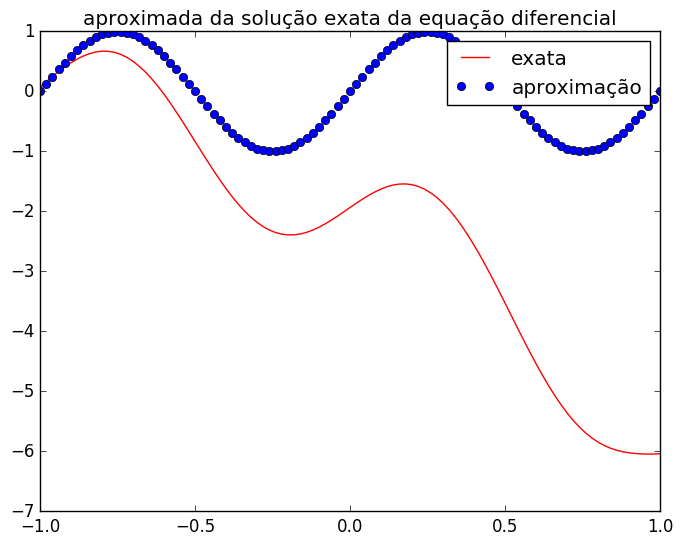

6.038715568384877

In [11]:
using PyPlot
x = [(1-ξ)*el.a/2 + (1+ξ)*el.b/2 for el in elemento]
maxerr = -1000000
for e = 1:nel
    uu = resp(x[e])
    err = maxabs(uu-Ue[:,e])
    if err > maxerr maxerr = err end
        
    plot(x[e], Ue[:,e], "r",label= "exata")
    plot(x[e], uu, "ob",label = "aproximação")
    title("aproximada da solução exata da equação diferencial")
    legend()
end
maxerr

In [12]:
Ue

101x1 Array{Float64,2}:
  0.0694064
  0.163294 
  0.251425 
  0.333926 
  0.41027  
  0.479469 
  0.54025  
  0.591191 
  0.630848 
  0.657845 
  0.670955 
  0.669163 
  0.651701 
  ⋮        
 -5.77526  
 -5.84474  
 -5.90138  
 -5.94623  
 -5.98055  
 -6.00574  
 -6.02327  
 -6.03461  
 -6.04105  
 -6.04361  
 -6.04287  
 -6.03872  